In [1]:
import sys; sys.path.append('..')
import pyzx as zx
import numpy as np
import quimb as qu
import matplotlib
import quimb.tensor as qtn

In [2]:
g = zx.Graph()
v1 = g.add_vertex(zx.VertexType.Z, qubit = 0, row = 1, phase = 0.3)
v2 = g.add_vertex(zx.VertexType.Z, qubit = 0, row = 2, phase = 0.3)
v3 = g.add_vertex(zx.VertexType.Z, qubit = 0, row = 3, phase = 0.5)
v4 = g.add_vertex(zx.VertexType.Z, qubit = 0, row = 4, phase = 0.7)

g.add_edge(g.edge(v1, v2), edgetype = zx.EdgeType.SIMPLE)
g.add_edge(g.edge(v2, v3), edgetype = zx.EdgeType.HADAMARD)
g.add_edge(g.edge(v3, v4), edgetype = zx.EdgeType.HADAMARD)

(2, 3)

In [3]:
zx.draw(g)

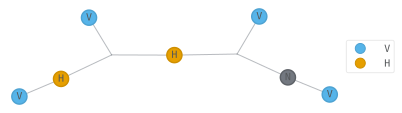

In [4]:
zx.to_quimb_tensor(g).draw(color = ['V', 'H'])

In [5]:
circuit = zx.generate.CNOT_HAD_PHASE_circuit(qubits=10,depth=40,clifford=False)
zx.draw(circuit)

In [6]:
g = circuit.to_graph()
zx.clifford_simp(g)
g.normalize();
zx.draw(g)

In [7]:
g

Graph(42 vertices, 56 edges)

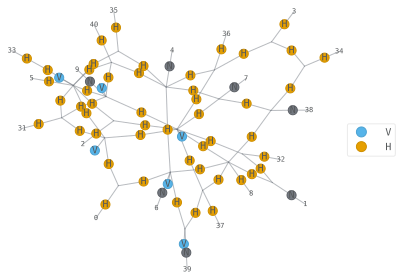

In [8]:
zx.to_quimb_tensor(g).draw(color = ['V', 'H'])

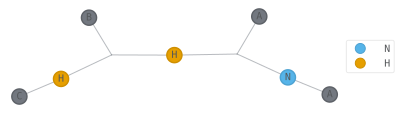

In [9]:
t1 = qtn.Tensor(data = [1, 2], inds = ("1",), tags = ("A",))
t2 = qtn.Tensor(data = [1, 3], inds = ("2",), tags = ("A",))
t3 = qtn.Tensor(data = [1, 4], inds = ("3",), tags = ("B",))
t4 = qtn.Tensor(data = [1, 5], inds = ("4",), tags = ("C",))
n1 = qtn.Tensor(data = np.array([1, 0, 0, 1]).reshape(2, 2), inds = ("1", "2"), tags = ("N",))
h1 = qtn.Tensor(data = qu.hadamard(), inds = ("2", "3"), tags = ("H",))
h2 = qtn.Tensor(data = qu.hadamard(), inds = ("3", "4"), tags = ("H",))
net = t1 & t2 & t3 & t4 & n1 & h1 & h2
net.draw(color = ['N', 'H'])

In [10]:
g = zx.Graph()
x = g.add_vertex(zx.VertexType.BOUNDARY, qubit = 0, row = 1)
y = g.add_vertex(zx.VertexType.BOUNDARY, qubit = 0, row = 2)
v1 = g.add_vertex(zx.VertexType.Z, qubit = 0, row = 3, phase = 0)
v2 = g.add_vertex(zx.VertexType.Z, qubit = 0, row = 4, phase = 0)
v3 = g.add_vertex(zx.VertexType.Z, qubit = 0, row = 5, phase = 0.5)
v4 = g.add_vertex(zx.VertexType.Z, qubit = 0, row = 6, phase = 0)
z = g.add_vertex(zx.VertexType.BOUNDARY, qubit = 0, row = 7)

g.add_edge(g.edge(x, v1), edgetype = zx.EdgeType.SIMPLE)
g.add_edge(g.edge(y, v1), edgetype = zx.EdgeType.SIMPLE)
g.add_edge(g.edge(v1, v2), edgetype = zx.EdgeType.SIMPLE)
g.add_edge(g.edge(v1, v3), edgetype = zx.EdgeType.HADAMARD)
g.add_edge(g.edge(v3, v4), edgetype = zx.EdgeType.HADAMARD)
g.add_edge(g.edge(v4, z), edgetype = zx.EdgeType.SIMPLE)

(5, 6)

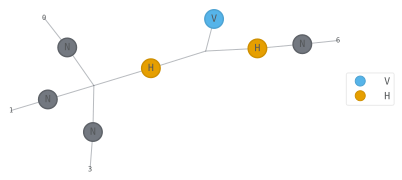

In [11]:
zx.to_quimb_tensor(g).draw(color = ['V', 'H'])

In [12]:
g = zx.Graph()
x = g.add_vertex(zx.VertexType.BOUNDARY, qubit = 0, row = 1)
y = g.add_vertex(zx.VertexType.BOUNDARY, qubit = 0, row = 3)
v = g.add_vertex(zx.VertexType.Z, qubit = 0, row = 2, phase = 0)
z = g.add_vertex(zx.VertexType.BOUNDARY, qubit = 0, row = 2)

g.add_edge(g.edge(x, v), edgetype = zx.EdgeType.HADAMARD)
g.add_edge(g.edge(y, v), edgetype = zx.EdgeType.HADAMARD)
g.add_edge(g.edge(v, z), edgetype = zx.EdgeType.HADAMARD)
tn = zx.to_quimb_tensor(g)

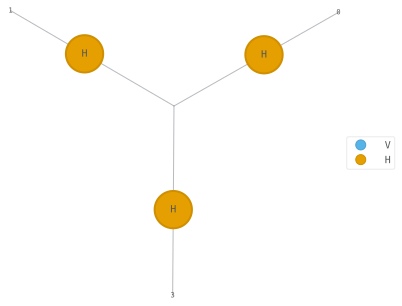

In [13]:
tn.draw(color = ['V', 'H'])

In [14]:
(tn & qtn.Tensor(data = [0, 1], inds = ("0",)) & 
      qtn.Tensor(data = [1, 0], inds = ("1",)) &
      qtn.Tensor(data = [0, 1], inds = ("3",))).contract(output_inds = ())

(0.7071067811865474+0j)

In [15]:
g = zx.Graph()
x = g.add_vertex(zx.VertexType.BOUNDARY)
y = g.add_vertex(zx.VertexType.BOUNDARY)
g.add_edge(g.edge(x, y), edgetype = zx.EdgeType.HADAMARD)

tn = zx.to_quimb_tensor(g)
(tn & qtn.Tensor(data = [1, 0], inds = ("0",)) & qtn.Tensor(data = [1 / np.sqrt(2), 1 / np.sqrt(2)], inds = ("1",))).contract(output_inds = ())

(0.9999999999999998+0j)

In [16]:
(tn & qtn.Tensor(data = [0, 1], inds = ("0",)) & qtn.Tensor(data = [1 / np.sqrt(2), -1 / np.sqrt(2)], inds = ("1",))).contract(output_inds = ()) == 1

False